In [ ]:
!pip install fitter
!pip install xlrd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from google.colab import drive
drive.mount('/content/drive')
from random import random
import os
import pandas as pd
from fitter import Fitter, get_common_distributions

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mpl.style.use('ggplot')

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/DatosMP4.xlsx")
df.head()

,Esfuerzo de Fluencia [MPa],Esfuerzo de Von Mises Año 1 [MPa],Esfuerzo de Von Mises Año 2 [MPa],Esfuerzo de Von Mises Año 3 [MPa],Esfuerzo de Von Mises Año 4 [MPa],Esfuerzo de Von Mises Año 5 [MPa],Esfuerzo de Von Mises Nuevo [MPa]
0,409.772785,286.267135,379.410636,420.885307,547.322699,424.137764,370.603273
1,399.368044,362.560712,471.182364,328.561081,328.929920,530.896426,371.720294
2,379.098797,376.878376,349.535479,343.778351,422.346981,428.814650,360.982653
3,397.319403,345.521110,351.357658,330.009833,330.643330,415.633807,379.564945
4,389.610689,363.136814,417.375399,354.024888,358.917737,374.990289,359.259070


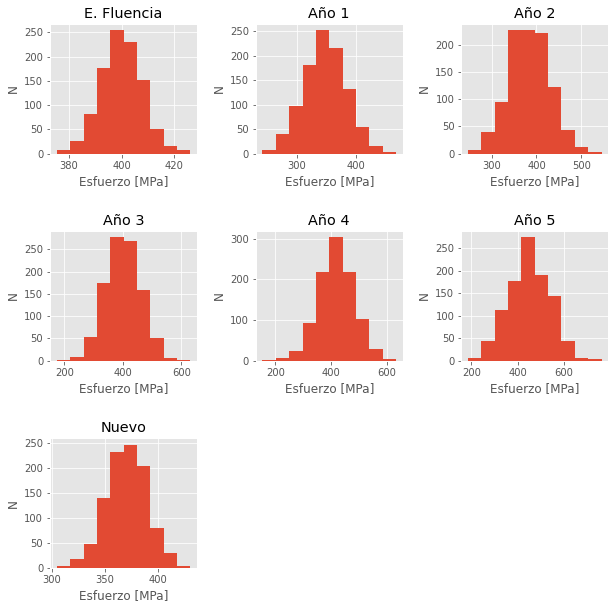

In [ ]:
graph_names = ['E. Fluencia','Año 1','Año 2','Año 3','Año 4','Año 5','Nuevo']
b_a = ["Esfuerzo de Fluencia [MPa]",
       "Esfuerzo de Von Mises Año 1 [MPa]",
       "Esfuerzo de Von Mises Año 2 [MPa]",
       "Esfuerzo de Von Mises Año 3 [MPa]",
       "Esfuerzo de Von Mises Año 4 [MPa]",
       "Esfuerzo de Von Mises Año 5 [MPa]",
       "Esfuerzo de Von Mises Nuevo [MPa]"]
fig0 = plt.figure("Histogramas", figsize=(10,10))
fig0.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(1,len(graph_names)+1):
  ax2 = fig0.add_subplot(3, 3, i)
  df[f"{b_a[i-1]}"].hist()
  ax2.set_title(graph_names[i-1])
  plt.xlabel('Esfuerzo [MPa]')
  plt.ylabel('N')

Parametros Esfuerzo fluencia:  (400.02482908039343, 7.91103861569235)


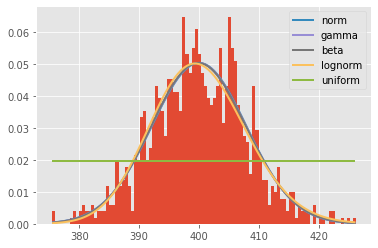

In [ ]:
f_Ef = Fitter(df["Esfuerzo de Fluencia [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_Ef.fit()
f_Ef.summary()
f_Ef.get_best(method='sumsquare_error')
f_Ef_params = f_Ef.fitted_param["norm"]
print('Parametros Esfuerzo fluencia: ',f_Ef_params)

Parametros Von Mises 1:  (348.3434273769656, 35.8483331629444)


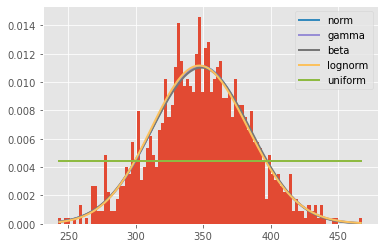

In [ ]:
f_vm1 = Fitter(df["Esfuerzo de Von Mises Año 1 [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_vm1.fit()
f_vm1.summary()
f_vm1.get_best(method='sumsquare_error')
f_vm1_params = f_vm1.fitted_param["norm"]
print('Parametros Von Mises 1: ',f_vm1_params)

Parametros Von Mises 2:  (384.1322333746128, 45.86580023052795)


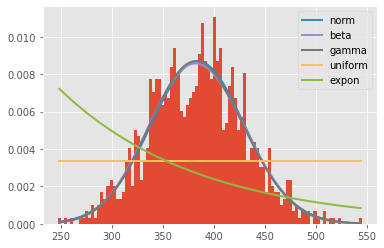

In [ ]:
f_vm2 = Fitter(df["Esfuerzo de Von Mises Año 2 [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_vm2.fit()
f_vm2.summary()
f_vm2.get_best(method='sumsquare_error')
f_vm2_params = f_vm2.fitted_param["norm"]
print('Parametros Von Mises 2: ',f_vm2_params)

Parametros Von Mises 3:  (400.2830877263884, 59.415859669422346)


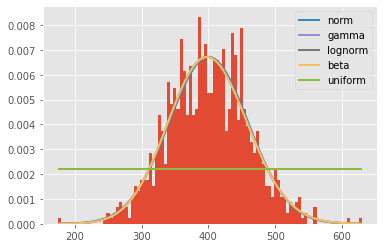

In [ ]:
f_vm3 = Fitter(df["Esfuerzo de Von Mises Año 3 [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_vm3.fit()
f_vm3.summary()
f_vm3.get_best(method='sumsquare_error')
f_vm3_params = f_vm3.fitted_param["norm"]
print('Parametros Von Mises 3: ',f_vm3_params)

Parametros Von Mises 4:  (7164.369061061977, -5085.026094572892, 0.7682272126352068)


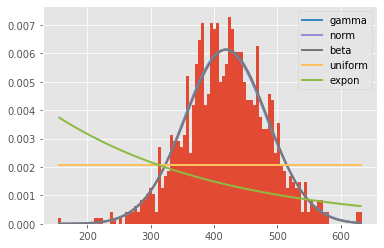

In [ ]:
f_vm4 = Fitter(df["Esfuerzo de Von Mises Año 4 [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_vm4.fit()
f_vm4.summary()
f_vm4.get_best(method='sumsquare_error')
f_vm4_params = f_vm4.fitted_param["gamma"]
print('Parametros Von Mises 4: ',f_vm4_params)

Parametros Von Mises 5:  (31.93656483972588, 31.40984777290516, -269.8686186788947, 1428.1550476803056)


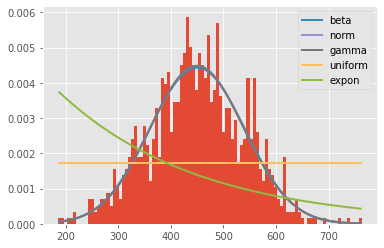

In [ ]:
f_vm5 = Fitter(df["Esfuerzo de Von Mises Año 5 [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_vm5.fit()
f_vm5.summary()
f_vm5.get_best(method='sumsquare_error')
f_vm5_params = f_vm5.fitted_param["beta"]
print('Parametros Von Mises 5: ',f_vm5_params)

Parametros Von Mises Nuevo:  (370.1793217541268, 18.732765037762416)


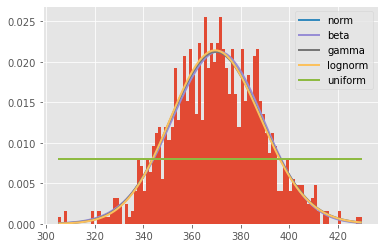

In [ ]:
f_vmN = Fitter(df["Esfuerzo de Von Mises Nuevo [MPa]"], distributions = ['gamma','beta','lognorm','expon','uniform','norm'])
f_vmN.fit()
f_vmN.summary()
f_vmN.get_best(method='sumsquare_error')
f_vmN_params = f_vmN.fitted_param["norm"]
print('Parametros Von Mises Nuevo: ',f_vmN_params)

In [ ]:
x_p = np.linspace(200,650,100)
dist_Ef = stats.norm(loc= f_Ef_params[0], scale = f_Ef_params[1])
dist_vm1 = stats.norm(loc = f_vm1_params[0], scale = f_vm1_params[1])
dist_vm2 = stats.norm(loc = f_vm2_params[0], scale = f_vm2_params[1])
dist_vm3 = stats.norm(loc = f_vm3_params[0], scale = f_vm3_params[1])
dist_vm4 = stats.gamma(a = f_vm4_params[0],loc = f_vm4_params[1], scale = f_vm4_params[2])
dist_vm5 = stats.beta(a = f_vm5_params[0],b = f_vm5_params[1],loc = f_vm5_params[2], scale = f_vm5_params[3])
dist_vmN = stats.norm(loc = f_vmN_params[0], scale = f_vmN_params[1])
#############################################################################

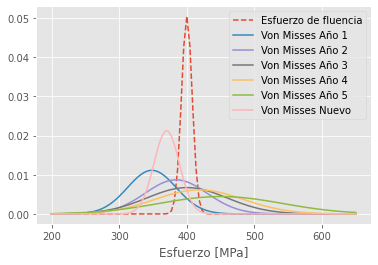

In [ ]:
plt.plot(x_p ,dist_Ef.pdf(x_p), label="Esfuerzo de fluencia", linestyle = '--')
plt.plot(x_p, dist_vm1.pdf(x_p), label="Von Misses Año 1")
plt.plot(x_p, dist_vm2.pdf(x_p), label="Von Misses Año 2")
plt.plot(x_p, dist_vm3.pdf(x_p), label="Von Misses Año 3")
plt.plot(x_p, dist_vm4.pdf(x_p), label="Von Misses Año 4")
plt.plot(x_p, dist_vm5.pdf(x_p), label="Von Misses Año 5")
plt.plot(x_p, dist_vmN.pdf(x_p), label="Von Misses Nuevo")
plt.xlabel('Esfuerzo [MPa]')
plt.legend()
plt.show()

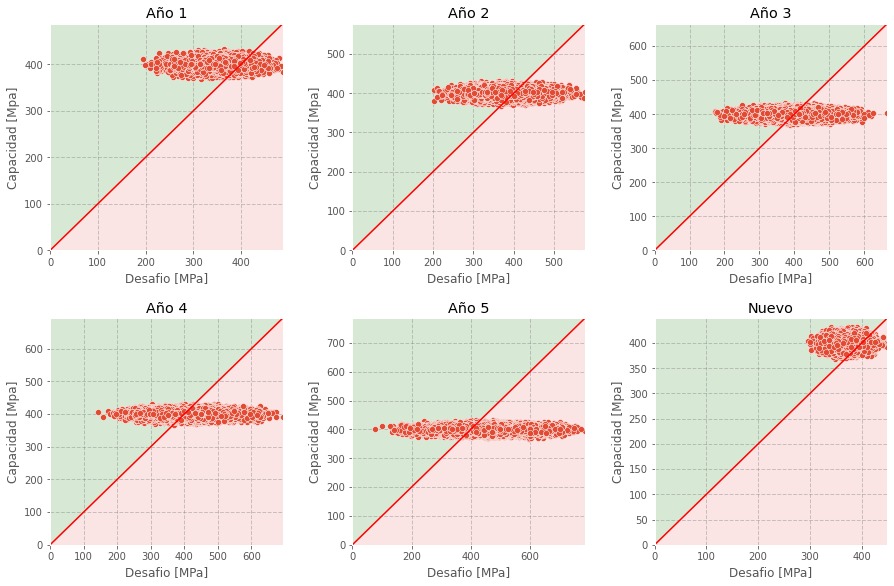

In [ ]:
N = 50000

Ef_r = stats.norm.rvs(loc= f_Ef_params[0], scale = f_Ef_params[1], size = N)
vm1_r = stats.norm.rvs(loc = f_vm1_params[0], scale = f_vm1_params[1], size = N)
vm2_r = stats.norm.rvs(loc = f_vm2_params[0], scale = f_vm2_params[1], size = N)
vm3_r = stats.norm.rvs(loc = f_vm3_params[0], scale = f_vm3_params[1], size = N)
vm4_r = stats.gamma.rvs(a = f_vm4_params[0],loc = f_vm4_params[1], scale = f_vm4_params[2], size = N)
vm5_r = stats.beta.rvs(a = f_vm5_params[0],b = f_vm5_params[1],loc = f_vm5_params[2], scale = f_vm5_params[3],size=N)
vmN_r = stats.norm.rvs(loc = f_vmN_params[0], scale = f_vmN_params[1], size = N)

##############  Ef - Vm <= 0
cont_vm1 = 0
prob_vm1 = []
for i in range(N):
  if Ef_r[i]-vm1_r[i] <= 0:
    cont_vm1 += 1
  prob_vm1.append(cont_vm1/(i+1))
  ###########
cont_vm2 = 0
prob_vm2 = []
for i in range(N):
  if Ef_r[i]-vm2_r[i] <= 0:
    cont_vm2 += 1
  prob_vm2.append(cont_vm2/(i+1))
  ###########
cont_vm3 = 0
prob_vm3 = []
for i in range(N):
  if Ef_r[i]-vm3_r[i] <= 0:
    cont_vm3 += 1
  prob_vm3.append(cont_vm3/(i+1))
  ###########
cont_vm4 = 0
prob_vm4 = []
for i in range(N):
  if Ef_r[i]-vm4_r[i] <= 0:
    cont_vm4 += 1
  prob_vm4.append(cont_vm4/(i+1))
  ###########
cont_vm5 = 0
prob_vm5 = []
for i in range(N):
  if Ef_r[i]-vm5_r[i] <= 0:
    cont_vm5 += 1
  prob_vm5.append(cont_vm5/(i+1))
  ###########
cont_vmN = 0
prob_vmN = []
for i in range(N):
  if Ef_r[i]-vmN_r[i] <= 0:
    cont_vmN += 1
  prob_vmN.append(cont_vmN/(i+1))
  ###########
graph_names = ['Año 1','Año 2','Año 3','Año 4','Año 5','Nuevo']
y_g = [Ef_r,Ef_r,Ef_r,Ef_r,Ef_r,Ef_r]
x_g =[vm1_r,vm2_r,vm3_r,vm4_r,vm5_r,vmN_r]
max_g = [max(vm1_r),max(vm2_r),max(vm3_r),max(vm4_r),max(vm5_r),max(vmN_r)]
fig1 = plt.figure("Funciones de estado limite", figsize=(15,15))
fig1.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1,len(x_g)+1):
  ax = fig1.add_subplot(3, 3, i)
  x_min, y_min, x_max, y_max = 0, 0, max_g[i-1], max_g[i-1]
  ax.set(xlim=(x_min,x_max),ylim=(y_min,y_max))
  ax.set(xlim=(x_min,x_max),ylim=(y_min,y_max))
  sns.scatterplot(x=x_g[i-1],y=y_g[i-1])
  x_max = y_max
  ax.plot([x_min,x_max],[y_min,y_max],'r')
  ax.fill_between(x=[x_min,x_max],y1=[y_min,y_max],y2=[y_max,y_max],color="#d7e8d5",zorder=0)
  ax.fill_between(x=[x_min,x_max],y1=[y_min,y_max],y2=[y_min,y_min],color="#fae4e4",zorder=0)
  plt.xlabel('Desafio [MPa]')
  plt.ylabel('Capacidad [Mpa]')
  plt.title(graph_names[i-1])
  ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)


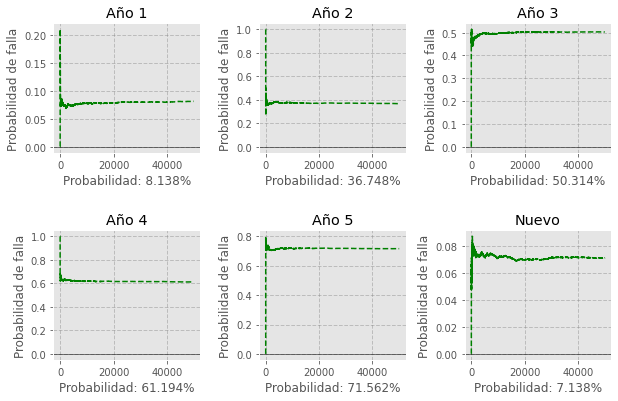

In [ ]:
graph_names = ['Año 1','Año 2','Año 3','Año 4','Año 5','Nuevo']
prob_g = [prob_vm1,prob_vm2,prob_vm3,prob_vm4,prob_vm5,prob_vmN]
probs_f =[prob_vm1[-1],prob_vm2[-1],prob_vm3[-1],prob_vm4[-1],prob_vm5[-1],prob_vmN[-1]]
fig2 = plt.figure("Probabilidades", figsize=(10,10))
fig2.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(1,len(prob_g)+1):
  ax2 = fig2.add_subplot(3, 3, i)
  ax2.plot(prob_g[i-1],"g--")
  ax2.set_xlabel("Probabilidad: {:.3f}%".format(probs_f[i-1]*100))
  ax2.set_ylabel("Probabilidad de falla")
  ax2.set_title(graph_names[i-1])
  ax2.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  ax2.axhline(0, color='black', linewidth=0.5)